<center><h1>Homework 3</h1>
<br/>

<u>Name:  Vaikunth Bhandare </u><br/>
SID:200393449
email:vkb806@uregina.ca</center>

#Part A: Choosing the dataset 
<p align="justify">Managing employees is a crucial task when it comes to running  large companies. One important aspect to consider while managing is employees quitting the organisation due to certain inhabitable conditions. To avoid any losses to the organisations to retain another candidate with similar skills, can be a time consuming as well as cost the company a good amount in case if the newer candidate turns out to be substandard. To avoid this an employee retention model enforcement would aid many oorganisations to find key reasons of employees quitting and rather sustain them for maintaining an accord.<br/>
The current dataset (Pavan Subhash, 2009) is an employee management dataset that consists of crucial employee details such as age, distance, environmental satisfaction, performance rating ,, job involvement, worklife balance which are in turn some of the key points in employee rating index which makes it a suitable option for modelling.</p>

In [0]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')
new_upload=files.upload()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Employee_dataset.csv to Employee_dataset.csv


#Part B: Importing data
<p align="justify">To import the data google drive is used to initially upload the csv file onto the drive and the drive is mounted then onto the google colab directory.
  Then, using pandas the csv file is retrieved from the google drive itself, and can be used thereafter for any data modifications by making a copy of the file so that the original data set is kept intact.

In [0]:
import pandas as pd
import io
input_csvFile = pd.read_csv(io.BytesIO(new_upload['Employee_dataset.csv']))
print("There are in total {} number of rows and columns".format(input_csvFile.shape))
#duplicate
data_set=input_csvFile.copy()

There are in total (1470, 35) number of rows and columns


#Part C: Scrubbing & Formatting
<p align="justify">The dataset shows wide variety of classifiers such as job classification, training times, worklifebalance, etc that could be used for possible data exploration on various crossmatching characteristics to furthur investigate them for any possible patterns. Also the data set consists of no missing values which is one of the crucial factors to be considered while exploring dataset as any missing columns might acgt as a false input which in turn might lead to be as an unsuitable factor to build up a machine learning model which it will be fed to.
  

In [0]:
data_set.columns.to_series().groupby(data_set.dtypes).groups #describr columns by group

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

In [0]:
data_set.isnull().sum()  ##check for any mising values in csv file

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#Part D: Exploratory Data analysis
<p align="justify"> On the initial findigs, the data consists of a vast data of employees as seen below, 1469 entries to be specific which is a very impressive amount of data that can be used to conduct an exploratory analysis. The Range also depicts the average, minimum average values on specific target fieds, the overall description and information about the data set.<br/>
  Gender description, Job Leavers, various departments & and job role determining possible patterns in the data set which could be used as an input characteristic for possible machine learning model. The correlation heatmap and the histogram representation also aid in identifying various aspects that might be considered crucial and possible model determination characteristics as there are many cross-correlation which need to be removed for a better suitable model.

In [0]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [0]:
data_set.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [0]:
# Gender of employees
data_set['Gender'].value_counts()


Male      882
Female    588
Name: Gender, dtype: int64

In [0]:
import pandas as pd
getGender = pd.DataFrame(columns=["Gender", "% of Leavers"])########################################################################----------------------------------------------------------0000000000000
i=0
for gType in list(data_set['Gender'].unique()):
    ratio = data_set[(data_set['Gender']==gType)&(data_set['Attrition']=="Yes")].shape[0] / data_set[data_set['Gender']==gType].shape[0]
    getGender.loc[i] = (gType, ratio*100)
    i += 1
    print("The number of {}'s leaving company is {:.2f}%".format(gType, ratio*100)) 

The number of Female's leaving company is 14.80%
The number of Male's leaving company is 17.01%


In [0]:
data_set['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [0]:
data_set['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

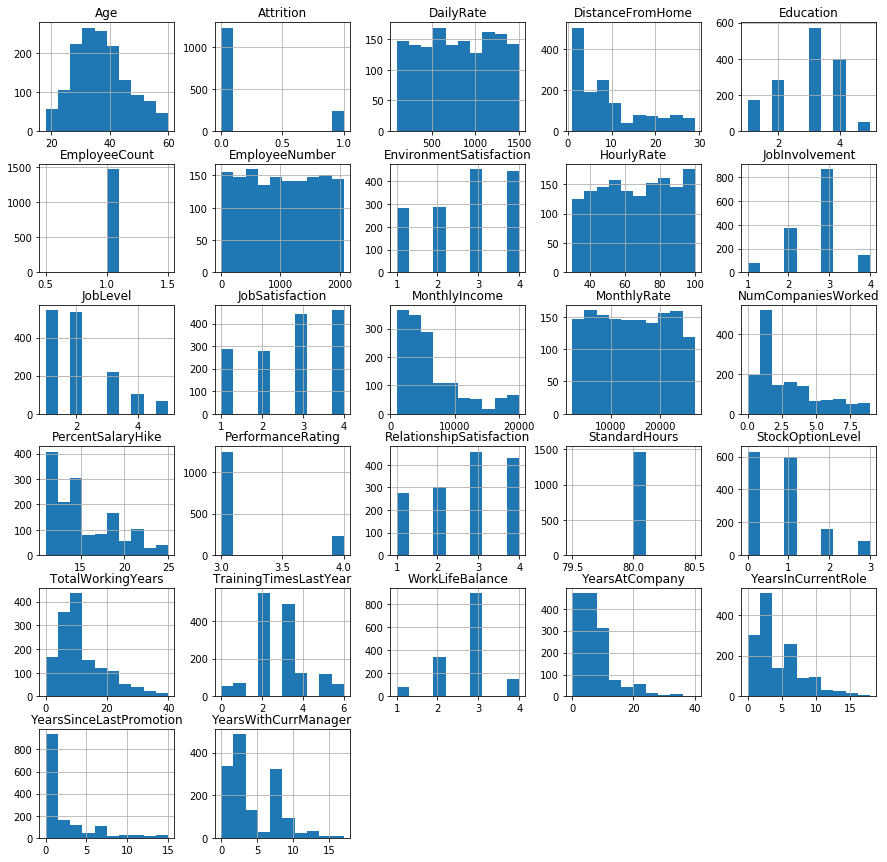

In [0]:
import matplotlib.pyplot as plt
data_set.hist(figsize=(15,15))
plt.show()

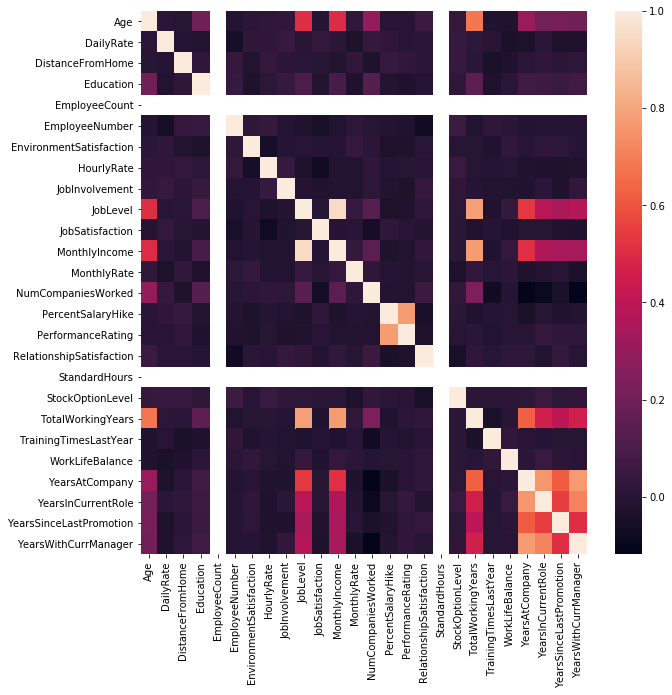

In [0]:
f = plt.subplots(1, 1, figsize = (10,10))
correlationValues = data_set.corr()
sns.heatmap(correlationValues)

#Part E: Report Initial Findings
<p align="justify"> With the collaborative understanding gathered from the graph depicted below, it can be seen that there is for sure a pattern where the employee attrition is affected by their monthly income or their job satisfactions which might not be accurate predictors, are altough a thought starter to find a better alternative model for obtaining a better accurate response for predicting employee attrition.<br/><br/>
  The various model suitable from these would be one of the classification algorithm for machine learning such as logistic regression, k-means or random decision classifier. These algorithm are best suited for datasets with different classification characteristics and for the current model, are apt as they are popularly used on algorithms such as loan calculation for high risk candidates, weather prediction model for forecasts and much more. The algorithms can also be safely assumed to work on the current dataset to predict employee satidfaction and various factors that would ultimately lead their seperation from the organisation and factors which would be crucial to take counter-attritive measures to retain them at the right point in time.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


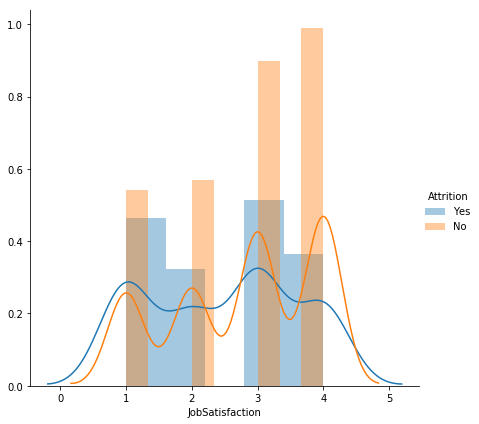

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style=("whitegrid");
sns.FacetGrid(data_set,hue="Attrition",size=6).map(sns.distplot,"JobSatisfaction").add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


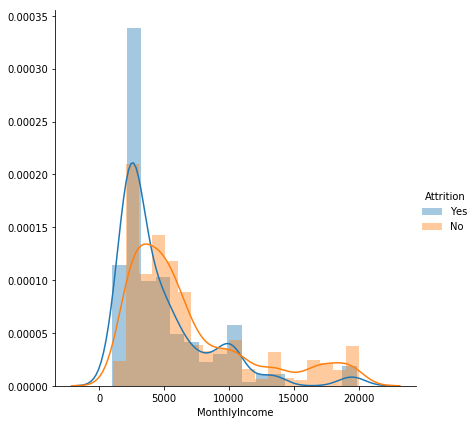

In [0]:
sns.set_style=("whitegrid");
sns.FacetGrid(data_set,hue="Attrition",size=6).map(sns.distplot,"MonthlyIncome").add_legend();
plt.show();

###References



Pavan Subhash(2017).  [online] kaggle. Available at: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset [Accessed 06 Aug. 2019].